In [ ]:
## Importa librerías útiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import itertools
import random



# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, roc_curve, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

#limpieza de texto 
import unicodedata
import re

#seaborn
import seaborn as sns

#truncar 
from math import trunc

#distrib
from scipy import stats

#outliers
from  functools import reduce

In [ ]:
# Funciones útiles
def grafica_matriz_confusion(cm, classes=[0,1], normalize=False, title='Matriz de confusión\n', cmap=plt.cm.Reds):
    """ 
    Función para mostrar la matriz de confusión de un problema de clasificación binario. 
    El parámetro cm puede ser el objeto resultante de ejecutar la función confusion_matrix() de la librería sklearn.
    
    Args:
        cm         matriz de confusión de sklearn
        classes    categorías de la variable target
        normalize  normaliza asignando el parámetro True
        title      string para definir el título para la gráfica
        cmap       mapa de colores
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max()
    text = [["VN =", "FN ="], ["FP =", "VP ="]]
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "     {}".format(round (cm[i, j],2)), horizontalalignment="left",
                 color="white" if cm[i, j] > thresh else "black")
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, text[j][i] , horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Valor real')
    plt.xlabel('Predicción')
    
def grafica_curva_roc(fpr, tpr, title='Curva ROC', note=''):
    """
    Función para graficar la curva ROC
    Los parámetros fpr y tpr son el output de ejecutar la función roc_curve de sklearn
    
    Args:
        fpr        Tasa de falsos positivos 
        tpr        Tasa de verdaderos positivos
        title      sting para definir el título de la gráfica
        note       Nota para mostrar en la gráfica
    """
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('Tasa de falsos positivos ')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title(title)
    if note: plt.text(0.6, 0.2, note)
    plt.show()



---




1.   Elemento de lista
2.   Elemento de lista


El layout de **happiness2020.csv** es:

* country: Nombre del país
* happiness_score: Score de felicidad
* social_support: Ayuda social
* healthy_life_expectancy: Expectativa de vida
* freedom_of_choices: Libertar de tomar decisiones de vida
* generosity: Generosidad
* perception_of_corruption: Percepción de la corrupción
* world_region: Región en donde se encuentra el país en cuestión


El layout de **countries_info.csv**

* country_name: Nombre del país
* area: Área en metros cuadrados
* population: Número de personas
* literacy: Porcentaje de alfabetismo


In [ ]:
# Carga el data set happiness2020.csv
happy=pd.read_excel("C:/Users/MX03932000/Documents/Personales/Mod_2/HW/happiness2020.xlsx")

In [ ]:
# Explora el set de datos (número de variables, observaciones, checa 5 registros y más!)
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   135 non-null    object 
 1   happiness_score           135 non-null    float64
 2   social_support            135 non-null    float64
 3   healthy_life_expectancy   135 non-null    float64
 4   freedom_of_choices        135 non-null    float64
 5   generosity                135 non-null    float64
 6   perception_of_corruption  135 non-null    float64
 7   world_region              135 non-null    object 
dtypes: float64(6), object(2)
memory usage: 8.6+ KB


In [ ]:
happy.shape

(135, 8)

In [ ]:
happy.describe()

,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,5.525062,0.815165,64.762495,0.790657,-0.022749,0.727447
std,1.123414,0.116311,6.694776,0.117230,0.146165,0.180406
min,2.566900,0.468671,48.003624,0.396573,-0.300907,0.109784
25%,4.749000,0.740405,59.809444,0.720287,-0.130953,0.675699
50%,5.541500,0.836419,66.480164,0.811602,-0.042309,0.780623
75%,6.292700,0.910313,69.145870,0.886453,0.083279,0.848558
max,7.808700,0.974670,76.804581,0.974998,0.519587,0.935585


In [ ]:
happy.head(5)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [ ]:
# Carga el data set countries_info.csv
# La variable literacy contiene números con formato europeo. Hint: busca en la documentación de pandas como importar estos datos para ser interpretados como números
country=pd.read_csv("C:/Users/MX03932000/Documents/Personales/Mod_2/HW/countries_info.csv",decimal=',')

In [ ]:
country.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,36.0
1,albania,28748,3581655,86.5
2,algeria,2381740,32930091,70.0
3,argentina,2766890,39921833,97.1
4,armenia,29800,2976372,98.6


In [ ]:
# Explora el set de datos (número de variables, observaciones, checa 5 registros y más!)
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  135 non-null    object 
 1   area          135 non-null    int64  
 2   population    135 non-null    int64  
 3   literacy      133 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.3+ KB


In [ ]:
country.shape

(135, 4)

In [ ]:
country.describe()

,area,population,literacy
count,1.350000e+02,1.350000e+02,133.000000
mean,9.007829e+05,4.552204e+07,81.851128
std,2.244994e+06,1.505270e+08,20.514483
min,3.160000e+02,2.993880e+05,17.600000
25%,6.540500e+04,4.636146e+06,70.000000
50%,2.375000e+05,1.023546e+07,90.900000
75%,7.000570e+05,2.967980e+07,98.400000
max,1.707520e+07,1.313974e+09,100.000000


In [ ]:
# Une los datos utilizando la función merge de pandas
# Ojo: ¿Cuál es la llave de cruce en cada set de datos? ¿Ves algo que pueda afectar a la hora de cruzar los datos con esta llave? Explica por que y toma la decisión correcta para transformar una de las variables de cruce


Se hará una tratamiento de texto para que la llave sea country_name y country en las tablas respectivas.

In [ ]:
def clean_text(text, pattern="[^a-zA-Z0-9 ]"):
    text=str(text)
    #para lidiar con acentos
    cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    #para obtenerlo e UTF-8, la misma codificación que tiene python
    cleaned_text = re.sub(pattern, " ", cleaned_text.decode("utf-8"), flags=re.UNICODE)
    #eliminar espacio antes y al final del string
    cleaned_text = u' '.join(cleaned_text.lower().strip().lstrip().split())
    return cleaned_text if cleaned_text!="nan" else np.nan

In [ ]:
country["country_name"]=country["country_name"].map(lambda x: clean_text(x, pattern="[^a-zA-Z0-9 ]") )
happy["country"]=happy["country"].map(lambda x: clean_text(x, pattern="[^a-zA-Z0-9 ]"))

In [ ]:
country.country_name.unique()

array(['afghanistan', 'albania', 'algeria', 'argentina', 'armenia',
       'australia', 'austria', 'azerbaijan', 'bahrain', 'bangladesh',
       'belarus', 'belgium', 'benin', 'bolivia', 'botswana', 'brazil',
       'bulgaria', 'burkina faso', 'burundi', 'cambodia', 'cameroon',
       'canada', 'chad', 'chile', 'china', 'colombia', 'comoros',
       'costa rica', 'croatia', 'cyprus', 'czech republic', 'denmark',
       'dominican republic', 'ecuador', 'egypt', 'el salvador', 'estonia',
       'ethiopia', 'finland', 'france', 'gabon', 'georgia', 'germany',
       'ghana', 'greece', 'guatemala', 'guinea', 'haiti', 'honduras',
       'hungary', 'iceland', 'india', 'indonesia', 'iran', 'iraq',
       'ireland', 'israel', 'italy', 'jamaica', 'japan', 'jordan',
       'kazakhstan', 'kenya', 'kuwait', 'kyrgyzstan', 'laos', 'latvia',
       'lebanon', 'lesotho', 'liberia', 'libya', 'lithuania',
       'luxembourg', 'macedonia', 'madagascar', 'malawi', 'malaysia',
       'mali', 'malta', 'mauri

In [ ]:
country.country_name.duplicated().sum()

0

In [ ]:
len(country.country_name.unique().tolist())

135

In [ ]:
happy.country.unique()

array(['afghanistan', 'albania', 'algeria', 'argentina', 'armenia',
       'australia', 'austria', 'azerbaijan', 'bahrain', 'bangladesh',
       'belarus', 'belgium', 'benin', 'bolivia', 'botswana', 'brazil',
       'bulgaria', 'burkina faso', 'burundi', 'cambodia', 'cameroon',
       'canada', 'chad', 'chile', 'china', 'colombia', 'comoros',
       'costa rica', 'croatia', 'cyprus', 'czech republic', 'denmark',
       'dominican republic', 'ecuador', 'egypt', 'el salvador', 'estonia',
       'ethiopia', 'finland', 'france', 'gabon', 'georgia', 'germany',
       'ghana', 'greece', 'guatemala', 'guinea', 'haiti', 'honduras',
       'hungary', 'iceland', 'india', 'indonesia', 'iran', 'iraq',
       'ireland', 'israel', 'italy', 'jamaica', 'japan', 'jordan',
       'kazakhstan', 'kenya', 'kuwait', 'kyrgyzstan', 'laos', 'latvia',
       'lebanon', 'lesotho', 'liberia', 'libya', 'lithuania',
       'luxembourg', 'macedonia', 'madagascar', 'malawi', 'malaysia',
       'mali', 'malta', 'mauri

In [ ]:
happy.country.duplicated().sum()

0

In [ ]:
len(happy.country.unique().tolist())

135

Hacemos el cruce, ya que validamos que tenemos 135 valores distintos en cada tabla y no existen duplicados que puedan causar problemas. 

In [ ]:
df_country=happy.merge(country, how='inner', left_on='country', right_on='country_name')

In [ ]:
df_country.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan,647500,31056997,36.0
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania,28748,3581655,86.5
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria,2381740,32930091,70.0
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina,2766890,39921833,97.1
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia,29800,2976372,98.6


In [ ]:
df_country=df_country.drop(columns=["country_name"])

In [ ]:
# Explora el set de datos que contiene los dos sets anteriores (número de variables, observaciones, checa 5 registros y más!)
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 134
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   135 non-null    object 
 1   happiness_score           135 non-null    float64
 2   social_support            135 non-null    float64
 3   healthy_life_expectancy   135 non-null    float64
 4   freedom_of_choices        135 non-null    float64
 5   generosity                135 non-null    float64
 6   perception_of_corruption  135 non-null    float64
 7   world_region              135 non-null    object 
 8   area                      135 non-null    int64  
 9   population                135 non-null    int64  
 10  literacy                  133 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 12.7+ KB


In [ ]:
df_country.shape

(135, 11)

In [ ]:
df_country.describe()

,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,area,population,literacy
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,1.350000e+02,1.350000e+02,133.000000
mean,5.525062,0.815165,64.762495,0.790657,-0.022749,0.727447,9.007829e+05,4.552204e+07,81.851128
std,1.123414,0.116311,6.694776,0.117230,0.146165,0.180406,2.244994e+06,1.505270e+08,20.514483
min,2.566900,0.468671,48.003624,0.396573,-0.300907,0.109784,3.160000e+02,2.993880e+05,17.600000
25%,4.749000,0.740405,59.809444,0.720287,-0.130953,0.675699,6.540500e+04,4.636146e+06,70.000000
50%,5.541500,0.836419,66.480164,0.811602,-0.042309,0.780623,2.375000e+05,1.023546e+07,90.900000
75%,6.292700,0.910313,69.145870,0.886453,0.083279,0.848558,7.000570e+05,2.967980e+07,98.400000
max,7.808700,0.974670,76.804581,0.974998,0.519587,0.935585,1.707520e+07,1.313974e+09,100.000000


In [ ]:
df_country["world_region"].value_counts()

Sub-Saharan Africa                    32
Western Europe                        20
Latin America and Caribbean           20
Middle East and North Africa          16
Central and Eastern Europe            14
Commonwealth of Independent States    12
Southeast Asia                         8
South Asia                             6
North America and ANZ                  4
East Asia                              3
Name: world_region, dtype: int64

In [ ]:
# Determina el top 10 de países más felices
df_country[["country","happiness_score"]].sort_values("happiness_score",ascending=False).head(10)

,country,happiness_score
38,finland,7.8087
31,denmark,7.6456
115,switzerland,7.5599
50,iceland,7.5045
92,norway,7.4880
87,netherlands,7.4489
114,sweden,7.3535
88,new zealand,7.2996
6,austria,7.2942
72,luxembourg,7.2375


In [ ]:
# Determina el top 10 de regiones con países más felices (¿Cómo puedes medir la felicidad por región?)

pt=pd.pivot_table(df_country, values='happiness_score',aggfunc='mean',index='world_region')
pt.sort_values("happiness_score",ascending=False)

,happiness_score
world_region,
North America and ANZ,7.173525
Western Europe,6.967405
Latin America and Caribbean,5.971280
Central and Eastern Europe,5.891393
Southeast Asia,5.517788
East Asia,5.483633
Commonwealth of Independent States,5.358342
Middle East and North Africa,5.269306
Sub-Saharan Africa,4.393856


Tome el enunciado de la siguiente manera: Expuse los paises ordenados de mayor a menor según su score de felicidad, solo de la región North America and ANZ. La cual tiene en promedio el score más alto entre sus paises. 

In [ ]:
# ¿Cuáles son los países de la región con países más felices? Muestra el nombre y el score de felicidad
df_country[(df_country["world_region"]=='North America and ANZ')][["country","happiness_score"]].sort_values("happiness_score",ascending=False).head(10)

,country,happiness_score
88,new zealand,7.2996
21,canada,7.2321
5,australia,7.2228
127,united states,6.9396


In [ ]:
df_country.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6


In [ ]:
# ¿Cuál es el top 10 de países con mayor porcentaje de alfabetismo?
df_country[["country","literacy"]].sort_values("literacy",ascending=False).head(10)

,country,literacy
72,luxembourg,100.0
92,norway,100.0
5,australia,100.0
38,finland,100.0
31,denmark,100.0
30,czech republic,99.9
50,iceland,99.9
98,poland,99.8
36,estonia,99.8
66,latvia,99.8


In [ ]:
# ¿Cuáles son las regiones del mundo que tienen los países con mayor tasa de alfabetismo?
pt=pd.pivot_table(df_country, values='literacy',aggfunc='mean',index='world_region')
pt.sort_values('literacy',ascending=False)

,literacy
world_region,
Commonwealth of Independent States,98.725000
Western Europe,98.280000
North America and ANZ,98.250000
Central and Eastern Europe,97.750000
East Asia,95.900000
Latin America and Caribbean,86.450000
Southeast Asia,85.050000
Middle East and North Africa,74.756250
Sub-Saharan Africa,61.090625


In [ ]:
# Muestra los países de la región con mayor porcentaje de alfabetismo
df_country[(df_country["world_region"]=='Commonwealth of Independent States')][["country","literacy"]].sort_values("literacy",ascending=False)

,country,literacy
124,ukraine,99.7
10,belarus,99.6
101,russia,99.6
116,tajikistan,99.4
129,uzbekistan,99.3
82,moldova,99.1
41,georgia,99.0
4,armenia,98.6
61,kazakhstan,98.4
122,turkmenistan,98.0


In [ ]:
# ¿Cuál es el top 10 de países de países con menor porcentaje de alfabetismo?
df_country[["country","literacy"]].sort_values("literacy",ascending=True).head(10)

,country,literacy
90,niger,17.6
17,burkina faso,26.6
106,sierra leone,31.4
46,guinea,35.9
0,afghanistan,36.0
104,senegal,40.2
54,iraq,40.4
12,benin,40.9
79,mauritania,41.7
37,ethiopia,42.7


In [ ]:
# ¿Cuáles son las regiones del mundo que tienen los países con menor tasa de alfabetismo?
pt=pd.pivot_table(df_country, values='literacy',aggfunc='mean',index='world_region')
x=pt.sort_values('literacy',ascending=False)
x.sort_values(by='literacy',ascending=True).head(3)

,literacy
world_region,
South Asia,53.633333
Sub-Saharan Africa,61.090625
Middle East and North Africa,74.756250


In [ ]:
# Muestra los países de la región con menor porcentaje de alfabetismo
df_country[(df_country["world_region"]=='South Asia')][["country","literacy"]].sort_values("literacy",ascending=True)

,country,literacy
0,afghanistan,36.0
9,bangladesh,43.1
86,nepal,45.2
93,pakistan,45.7
51,india,59.5
112,sri lanka,92.3


In [ ]:
# Determina el top 10 de países con mayor cantidad de personas
df_country[["country","population"]].sort_values("population",ascending=False).head(10)


,country,population
24,china,1313973713
51,india,1095351995
127,united states,298444215
52,indonesia,245452739
15,brazil,188078227
93,pakistan,165803560
9,bangladesh,147365352
101,russia,142893540
91,nigeria,131859731
59,japan,127463611


In [ ]:
# ¿Cuáles son las regiones más pobladas del mundo?
pt=pd.pivot_table(df_country, values="population",aggfunc='sum',index='world_region')
x=pt.sort_values('population',ascending=False)
x

,population
world_region,
South Asia,1488087291
East Asia,1444269548
Sub-Saharan Africa,586255523
Latin America and Caribbean,541214569
Southeast Asia,533083893
Middle East and North Africa,397348436
Western Europe,396650209
North America and ANZ,355883369
Commonwealth of Independent States,280081548


In [ ]:
# ¿Cuáles son los países en las regiones menos pobladas del mundo?
df_country[(df_country["world_region"]=='Central and Eastern Europe')][["country","population"]].sort_values("population",ascending=True)

,country,population
36,estonia,1324333
109,slovenia,2010347
73,macedonia,2050554
66,latvia,2274735
1,albania,3581655
71,lithuania,3585906
28,croatia,4494749
108,slovakia,5439448
16,bulgaria,7385367
105,serbia,9396411


In [ ]:
# ¿Cuál es el score de felicidad de los tres países más poblados del mundo?
df_country[["country","population","happiness_score"]].sort_values("population",ascending=False).head(3)


,country,population,happiness_score
24,china,1313973713,5.1239
51,india,1095351995,3.5733
127,united states,298444215,6.9396


In [ ]:
# ¿Cuál es el score de felicidad de los tres países menos poblados del mundo?
df_country[["country","population","happiness_score"]].sort_values("population",ascending=True).head(3)


,country,population,happiness_score
50,iceland,299388,7.5045
78,malta,400214,6.7728
72,luxembourg,474413,7.2375


In [ ]:
# Gráfica y explora las variables happiness_score, literacy y population
# Hint: Utiliza los métodos vistos en clase para variables númericas

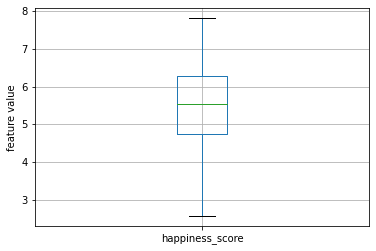

In [ ]:
df_country.boxplot(column="happiness_score")
plt.ylabel('feature value')
plt.show()

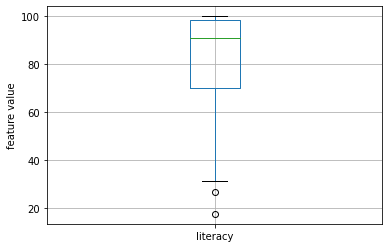

In [ ]:
df_country.boxplot(column="literacy")
plt.ylabel('feature value')
plt.show()

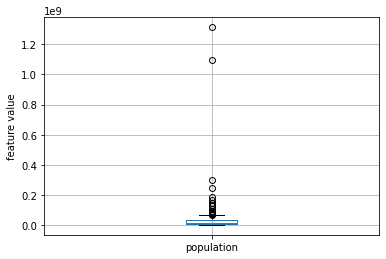

In [ ]:
df_country.boxplot(column="population")
plt.ylabel('feature value')
plt.show()

<AxesSubplot:>

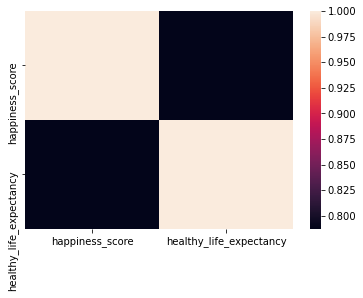

In [ ]:
# ¿Existe una relación (¿de qué tipo?) entre la variable happiness_score y healthy_life_expectancy?
# Hint: Gráfica la relación que existe entre las variables
cor=df_country[["happiness_score","healthy_life_expectancy"]].corr()
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns)

In [ ]:
df_country[["happiness_score","healthy_life_expectancy"]].corr()

,happiness_score,healthy_life_expectancy
happiness_score,1.00000,0.78755
healthy_life_expectancy,0.78755,1.00000


Se tiene una correlación de .78 que si podría ser causal, asumiendo que el estado de ánimo o sentimiento de felicidad se detone de su bienestar corporal. Mientras menos esperanza de vida se tenga en promedio por país podríamos pensar que en generar el deterioro de salud es acelerado. 

¿Podrías entrenar un modelo de regresión lineal para predecir la variable healthy_life_expectancy con base en la variable independiente happiness_score? ¿Sería un buen modelo para predecir la expectativa de vida? Elabora tu respuesta


In [ ]:
# Define la variable target (Weight)
y=df_country[["healthy_life_expectancy"]]

# Define el conjunto de variables independientes
X=df_country[["happiness_score"]]

# Utiliza la función de sklearn para partir los datos en set de entrenamiento y validación
# 70% train, 30% test, utiliza una semilla para poder replicar resultados (busca en la documentación de sklearn como hacer esto)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

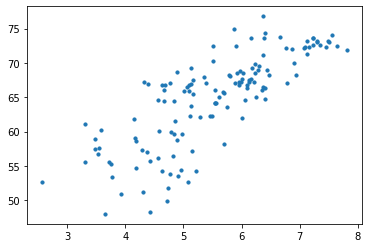

In [ ]:
plt.scatter(X, y, s=10)
plt.show()

In [ ]:
# Entrena un modelo de regresión lineal y determina el score R² y el score de error (MSE)
modelo_LinReg = LinearRegression()
modelo_LinReg.fit(X_train, y_train)
y_pred_proba_LinReg = modelo_LinReg.predict(X_test)

In [ ]:
print("R²: {0}, MSE: {1}".format(round(modelo_LinReg.score(X_test, y_test), 5), round(mean_squared_error(y_test,y_pred_proba_LinReg),5)))

R²: 0.61649, MSE: 15.47416


In [ ]:
w0 = float(modelo_LinReg.intercept_)
w1 = float(modelo_LinReg.coef_)

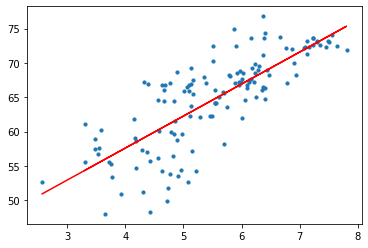

In [ ]:
plt.scatter(X, y, s=10)
plt.plot(X, w0 + X*w1, color='red')
plt.show()


En esta parte se requiere llevar a cabo una tarea de clasificación. Para ello vamos a utilizar una regresión logística. Primero que nada expliquemos el modelo anterior.

**Regresión logística**
Es un modelo que sirve para clasificar observaciones. En pocas palabras (y para esta tarea) la regresión logística es una transformación del modelo de regresión lineal sin término regularizador. Es decir, una regresión logística transforma las predicciones de una regresión lineal a un valor de probabilidad. 

$y = \textbf{X}^T\textbf{W}$

$y\_pred = \sigma(y)$

En esta parte de la tarea deberás utilizar el método de gradiente descendente para estimar los parámetros de una regresión lineal y después transformar las predicciones en probabilidades utilizando la función sigmoide. 

Vamos a utilizar un data set con información de los pasajeros del barco Titanic. A continuación puedes ver el layout:

* name: Nombre del pasajero
* sex: Sexo del pasajero
* age: edad en años
* sibsp: # hijos / esposos abordo del Titanic
* parch: # padres / niños abordo del Titanic
* ticket: número de ticket de pasajero
* fare: precio del ticket
* cabin: Número de cabina en el barco
* embarked: Puerto de embarcación


In [ ]:

# Carga los datos
titanic=pd.read_excel("C:/Users/MX03932000/Documents/Personales/Mod_2/HW/titanic.xlsx")

In [ ]:
# Explora el data set
# Aquí ocupa todo lo que ya sabes para analizar un set de datos. Si el análisis que vas a realizar es muy bueno, podríamos considerar tener puntos extras
titanic.head()

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
titanic.columns

Index(['survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')

In [ ]:
titanic=titanic.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'])

In [ ]:
titanic.head()

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [ ]:
#si el ticket era único hay que realizar un limpieza en estos duplicados. Se tomará el supuesto de que no. 
titanic.ticket.duplicated().sum()

370

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB


In [ ]:
for col in titanic:
    
    print(col)
    display(titanic[col].unique())
    print("\n")

survived


array([1, 0], dtype=int64)



name


array(['Allen, Miss. Elisabeth Walton', 'Allison, Master. Hudson Trevor',
       'Allison, Miss. Helen Loraine', ..., 'Zakarian, Mr. Mapriededer',
       'Zakarian, Mr. Ortin', 'Zimmerman, Mr. Leo'], dtype=object)



sex


array(['female', 'male'], dtype=object)



age


array([29.    ,  0.9167,  2.    , 30.    , 25.    , 48.    , 63.    ,
       39.    , 53.    , 71.    , 47.    , 18.    , 24.    , 26.    ,
       80.    ,     nan, 50.    , 32.    , 36.    , 37.    , 42.    ,
       19.    , 35.    , 28.    , 45.    , 40.    , 58.    , 22.    ,
       41.    , 44.    , 59.    , 60.    , 33.    , 17.    , 11.    ,
       14.    , 49.    , 76.    , 46.    , 27.    , 64.    , 55.    ,
       70.    , 38.    , 51.    , 31.    ,  4.    , 54.    , 23.    ,
       43.    , 52.    , 16.    , 32.5   , 21.    , 15.    , 65.    ,
       28.5   , 45.5   , 56.    , 13.    , 61.    , 34.    ,  6.    ,
       57.    , 62.    , 67.    ,  1.    , 12.    , 20.    ,  0.8333,
        8.    ,  0.6667,  7.    ,  3.    , 36.5   , 18.5   ,  5.    ,
       66.    ,  9.    ,  0.75  , 70.5   , 22.5   ,  0.3333,  0.1667,
       40.5   , 10.    , 23.5   , 34.5   , 20.5   , 30.5   , 55.5   ,
       38.5   , 14.5   , 24.5   , 60.5   , 74.    ,  0.4167, 11.5   ,
       26.5   ])



sibsp


array([0, 1, 2, 3, 4, 5, 8], dtype=int64)



parch


array([0, 2, 1, 4, 3, 5, 6, 9], dtype=int64)



ticket


array([24160, 113781, 19952, 13502, 112050, 11769, 'PC 17609', 'PC 17757',
       'PC 17477', 19877, 27042, 'PC 17318', 'PC 17558', 11813, 13050,
       11751, 111369, 'PC 17483', 13905, 11967, 'PC 17760', 110564,
       113784, 112277, 36928, 113783, 110489, 'PC 17608', 113505, 111427,
       113054, 'PC 17591', 112379, 'PC 17610', 16966, 113050, 113798,
       'PC 17476', 'PC 17606', 'PC 17755', 695, 113059, 113760, 19924,
       17770, 'W.E.P. 5734', 113806, 110152, 'PC 17594', 112051, 13508,
       110465, 5727, 'PC 17756', 11770, 113791, 'WE/P 5735', 112901,
       'PC 17599', 113055, 113804, 'F.C. 12750', 17474, 33638, 'PC 17761',
       11755, 'PC 17485', 'PC 17580', 11767, 36947, 'PC 17531',
       'PC 17598', '17421', 'PC 17474', '113051', '19950', '113778',
       'PC 17611', '17765', '13568', '13567', '112058', '113803',
       '111320', '113503', '112378', 'PC 17593', '17453', 'PC 17754',
       '113780', '112053', 'PC 17582', 'PC 17759', '11765', 'PC 17572',
       '113796



fare


array([211.3375, 151.55  ,  26.55  ,  77.9583,   0.    ,  51.4792,
        49.5042, 227.525 ,  69.3   ,  78.85  ,  30.    ,  25.925 ,
       247.5208,  76.2917,  75.2417,  52.5542, 221.7792,  26.    ,
        91.0792, 135.6333,  35.5   ,  31.    , 164.8667, 262.375 ,
        55.    ,  30.5   ,  50.4958,  39.6   ,  27.7208, 134.5   ,
        26.2875,  27.4458, 512.3292,   5.    ,  47.1   , 120.    ,
        61.175 ,  53.1   ,  86.5   ,  29.7   , 136.7792,  52.    ,
        25.5875,  83.1583,  25.7   ,  71.    ,  71.2833,  57.    ,
        81.8583, 106.425 ,  56.9292,  78.2667,  31.6792,  31.6833,
       110.8833,  26.3875,  27.75  , 263.    , 133.65  ,  49.5   ,
        79.2   ,  38.5   , 211.5   ,  59.4   ,  89.1042,  34.6542,
        28.5   , 153.4625,  63.3583,  55.4417,  76.7292,  42.4   ,
        83.475 ,  93.5   ,  42.5   ,  51.8625,  50.    ,  57.9792,
        90.    ,  30.6958,  80.    ,  28.7125,  25.9292,  39.4   ,
        45.5   , 146.5208,  82.1708,  57.75  , 113.275 ,  26.2



cabin


array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '



embarked


array(['S', 'C', nan, 'Q'], dtype=object)

<AxesSubplot:xlabel='survived', ylabel='count'>

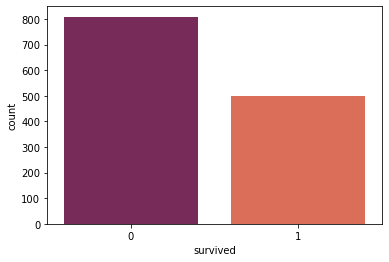

In [ ]:
sns.countplot(x='survived',data=titanic,palette='rocket')

<AxesSubplot:xlabel='sex', ylabel='count'>

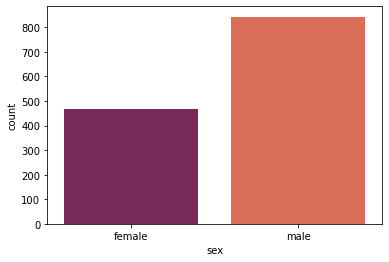

In [ ]:
sns.countplot(x='sex',data=titanic,palette='rocket')

(array([34., 17., 11., 10., 14.,  8., 13., 27., 59., 55., 85., 75., 65.,
        63., 73., 49., 41., 56., 25., 39., 32., 19., 29., 28., 24., 14.,
        14., 13., 11., 10., 11.,  9.,  4.,  1.,  2.,  3.,  1.,  1.,  0.,
         1.]),
 array([ 0.1667   ,  2.1625325,  4.158365 ,  6.1541975,  8.15003  ,
        10.1458625, 12.141695 , 14.1375275, 16.13336  , 18.1291925,
        20.125025 , 22.1208575, 24.11669  , 26.1125225, 28.108355 ,
        30.1041875, 32.10002  , 34.0958525, 36.091685 , 38.0875175,
        40.08335  , 42.0791825, 44.075015 , 46.0708475, 48.06668  ,
        50.0625125, 52.058345 , 54.0541775, 56.05001  , 58.0458425,
        60.041675 , 62.0375075, 64.03334  , 66.0291725, 68.025005 ,
        70.0208375, 72.01667  , 74.0125025, 76.008335 , 78.0041675,
        80.       ]),
 <BarContainer object of 40 artists>)

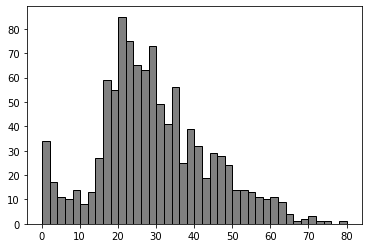

In [ ]:
plt.hist(titanic["age"], color = 'gray', edgecolor = 'black',
         bins = int(200/5))

<AxesSubplot:xlabel='sibsp', ylabel='count'>

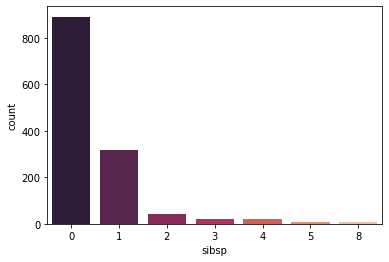

In [ ]:
sns.countplot(x='sibsp',data=titanic,palette='rocket')

<AxesSubplot:xlabel='parch', ylabel='count'>

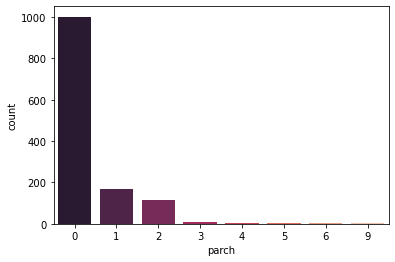

In [ ]:
sns.countplot(x='parch',data=titanic,palette='rocket')

(array([560., 267., 197.,  46.,  62.,  40.,  41.,  11.,  13.,   4.,  13.,
         12.,   4.,   0.,   0.,   0.,   9.,   9.,   0.,   3.,  13.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   4.]),
 array([  0.     ,  12.80823,  25.61646,  38.42469,  51.23292,  64.04115,
         76.84938,  89.65761, 102.46584, 115.27407, 128.0823 , 140.89053,
        153.69876, 166.50699, 179.31522, 192.12345, 204.93168, 217.73991,
        230.54814, 243.35637, 256.1646 , 268.97283, 281.78106, 294.58929,
        307.39752, 320.20575, 333.01398, 345.82221, 358.63044, 371.43867,
        384.2469 , 397.05513, 409.86336, 422.67159, 435.47982, 448.28805,
        461.09628, 473.90451, 486.71274, 499.52097, 512.3292 ]),
 <BarContainer object of 40 artists>)

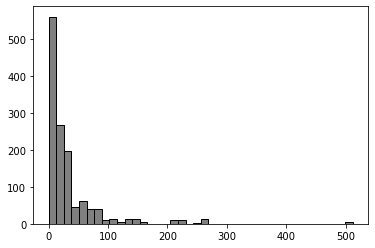

In [ ]:
plt.hist(titanic["fare"], color = 'gray', edgecolor = 'black',
         bins = int(200/5))

<AxesSubplot:xlabel='embarked', ylabel='count'>

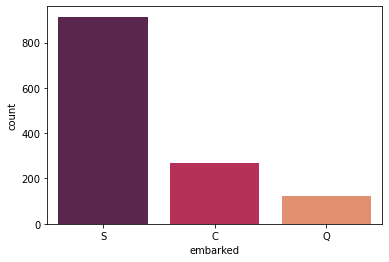

In [ ]:

sns.countplot(x='embarked',data=titanic,palette='rocket')

In [ ]:
# ¿Hace sentido utilizar todas las columnas para entrenar un modelo de clasificación? Elimina variables que podrían meter ruido y quedate solo con las que consideres cruciales



In [ ]:
#checaremos completitud para ver que todas son funcionales 
def completitud(df):
    comple=pd.DataFrame(df.isnull().sum())
    comple.reset_index(inplace=True)
    comple=comple.rename(columns={"index":"columna",0:"total"})
    comple["completitud"]=(1-comple["total"]/df.shape[0])*100
    comple=comple.sort_values(by="completitud",ascending=True)
    comple.reset_index(drop=True,inplace=True)
    return comple

In [ ]:
completitud(titanic)

,columna,total,completitud
0,cabin,1014,22.536287
1,age,263,79.908327
2,embarked,2,99.847212
3,fare,1,99.923606
4,survived,0,100.000000
5,name,0,100.000000
6,sex,0,100.000000
7,sibsp,0,100.000000
8,parch,0,100.000000
9,ticket,0,100.000000


In [ ]:

titanic=titanic.drop(columns=['name','ticket','cabin'])

Se eliminarán:
* name:Porque no suma valor a un modelo de ML 
* ticket: Es tan variable que meterá mucho ruido y la cantidad de registros no son suficientes como para hacer alguna transformación que la contemple. 
* cabin: Tiene 22% de completitud y no es funcional. 


In [ ]:
# Preprocesa los datos
# Hint: crea variables dummies para la variable "sex"
titanic = pd.get_dummies(data=titanic, columns=['sex'])

In [ ]:
titanic=titanic.drop(columns=['sex_male'])

In [ ]:
# Mostrar el nombre de las variables dummy creadas
titanic.columns

Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'sex_female'], dtype='object')

In [ ]:
# Define la variable target (survived)

y=titanic["survived"]
# Define el conjunto de variables independientes
X=titanic[['age', 'sibsp', 'parch', 'fare', 'embarked', 'sex_female']]

In [ ]:
# Determina cuántas observaciones tienen un valor missing

X.isnull().sum(axis=1).sum()

266

In [ ]:
# Cuál o cuáles variables tienen valores missing
for col in X:
    print(col)
    display(X[col].isnull().sum())
    print("\n")

age


263



sibsp


0



parch


0



fare


1



embarked


2



sex_female


0

In [ ]:
# Describe las variables para ver qué método podría servirnos para imputar valores nulos
X.describe()

,age,sibsp,parch,fare,sex_female
count,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,29.881135,0.498854,0.385027,33.295479,0.355997
std,14.413500,1.041658,0.865560,51.758668,0.478997
min,0.166700,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,39.000000,1.000000,0.000000,31.275000,1.000000
max,80.000000,8.000000,9.000000,512.329200,1.000000


Para la variable embarked como es categórica imputaremos con la moda. 

In [ ]:

X["embarked"].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [ ]:
X["embarked"]=X["embarked"].fillna("S")

<ipython-input-210-4d5e5b36856e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["embarked"]=X["embarked"].fillna("S")


Imputaremos el valor nulo de fare con su media, no hacemos más tratamiento de distribución dado que es un solo null. 

In [ ]:
X["fare"]=X["fare"].fillna(X["fare"].mean())

<ipython-input-211-23e5e989d831>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["fare"]=X["fare"].fillna(X["fare"].mean())


A diferencia de age, la cual si haremos una imputación más técnica. 

In [ ]:
def imputa (df,col):
    media=df[col].dropna().mean()
    moda=df[col].dropna().mode()
    mediana=df[col].dropna().median()
    originales=list(df[col].dropna().values)
    print("media")
    imputados=list(df[col].fillna(media).values)
    display(stats.ks_2samp(originales,imputados))
    print("mediana")
    imputados=list(df[col].fillna(mediana).values)
    display(stats.ks_2samp(originales,imputados))
    print("moda")
    imputados=list(df[col].fillna(moda).values)
    display(stats.ks_2samp(originales,imputados))

In [ ]:
imputa (X,"age")

media


KstestResult(statistic=0.10929409135460198, pvalue=1.6509463093283827e-06)

mediana


KstestResult(statistic=0.09796131211045168, pvalue=2.5821874458653582e-05)

moda


KstestResult(statistic=0.20091673032849502, pvalue=4.918472526828096e-21)

Imputaremos con la mediana ya que presenta menor estadístico y mayor p-value en la prueba ks. 

In [ ]:
X["age"]=X["age"].fillna(X["age"].median())

<ipython-input-214-232320aea0b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age"]=X["age"].fillna(X["age"].median())


In [ ]:
X.describe()

,age,sibsp,parch,fare,sex_female
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.503183,0.498854,0.385027,33.295479,0.355997
std,12.905246,1.041658,0.865560,51.738879,0.478997
min,0.166700,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,35.000000,1.000000,0.000000,31.275000,1.000000
max,80.000000,8.000000,9.000000,512.329200,1.000000


(array([ 34.,  17.,  11.,  10.,  14.,   8.,  13.,  27.,  59.,  55.,  85.,
         75.,  65., 326.,  73.,  49.,  41.,  56.,  25.,  39.,  32.,  19.,
         29.,  28.,  24.,  14.,  14.,  13.,  11.,  10.,  11.,   9.,   4.,
          1.,   2.,   3.,   1.,   1.,   0.,   1.]),
 array([ 0.1667   ,  2.1625325,  4.158365 ,  6.1541975,  8.15003  ,
        10.1458625, 12.141695 , 14.1375275, 16.13336  , 18.1291925,
        20.125025 , 22.1208575, 24.11669  , 26.1125225, 28.108355 ,
        30.1041875, 32.10002  , 34.0958525, 36.091685 , 38.0875175,
        40.08335  , 42.0791825, 44.075015 , 46.0708475, 48.06668  ,
        50.0625125, 52.058345 , 54.0541775, 56.05001  , 58.0458425,
        60.041675 , 62.0375075, 64.03334  , 66.0291725, 68.025005 ,
        70.0208375, 72.01667  , 74.0125025, 76.008335 , 78.0041675,
        80.       ]),
 <BarContainer object of 40 artists>)

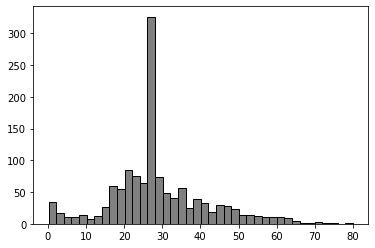

In [ ]:
# Imputa los valores missing de las variables con valores missing

plt.hist(X["age"], color = 'gray', edgecolor = 'black',
         bins = int(200/5))




(array([560., 267., 198.,  46.,  62.,  40.,  41.,  11.,  13.,   4.,  13.,
         12.,   4.,   0.,   0.,   0.,   9.,   9.,   0.,   3.,  13.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   4.]),
 array([  0.     ,  12.80823,  25.61646,  38.42469,  51.23292,  64.04115,
         76.84938,  89.65761, 102.46584, 115.27407, 128.0823 , 140.89053,
        153.69876, 166.50699, 179.31522, 192.12345, 204.93168, 217.73991,
        230.54814, 243.35637, 256.1646 , 268.97283, 281.78106, 294.58929,
        307.39752, 320.20575, 333.01398, 345.82221, 358.63044, 371.43867,
        384.2469 , 397.05513, 409.86336, 422.67159, 435.47982, 448.28805,
        461.09628, 473.90451, 486.71274, 499.52097, 512.3292 ]),
 <BarContainer object of 40 artists>)

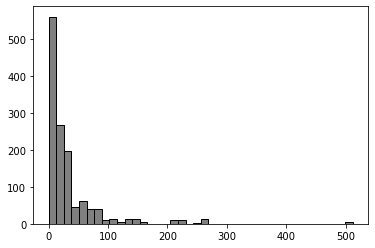

In [ ]:

plt.hist(X["fare"], color = 'gray', edgecolor = 'black',
         bins = int(200/5))



In [ ]:
# Comprueba que ya no existan registros con valores nulos
X.isnull().sum()

age           0
sibsp         0
parch         0
fare          0
embarked      0
sex_female    0
dtype: int64

In [ ]:
#transformaremos embarked a dummy
X=pd.get_dummies(data=X, columns=['embarked'])

In [ ]:
X=X.drop(columns=["embarked_Q"])

In [ ]:
# Revisa los rangos de las distintas variables independientes
for col in X:
    print(col)
    print(max(X[col])-min(X[col]))
    print("\n")

age
79.8333


sibsp
8


parch
9


fare
512.3292


sex_female
1


embarked_C
1


embarked_S
1




In [ ]:
#eliminamos outliers

for col in X: 
    print(col)
    print(X[col].describe(percentiles=[.05,.95]))
    print("\n")

age
count    1309.000000
mean       29.503183
std        12.905246
min         0.166700
5%          7.400000
50%        28.000000
95%        55.000000
max        80.000000
Name: age, dtype: float64


sibsp
count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
5%          0.000000
50%         0.000000
95%         2.000000
max         8.000000
Name: sibsp, dtype: float64


parch
count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
5%          0.000000
50%         0.000000
95%         2.000000
max         9.000000
Name: parch, dtype: float64


fare
count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
5%          7.225000
50%        14.454200
95%       133.650000
max       512.329200
Name: fare, dtype: float64


sex_female
count    1309.000000
mean        0.355997
std         0.478997
min         0.000000
5%          0.000000
50%         0.000000
95%         1.000000
max         1.000000
Name: sex_f

In [ ]:
df=X.copy()

In [ ]:
def OUTLIERS(df,cols):
    results=pd.DataFrame()
    data_iqr=df.copy()
    data_per=df.copy()
    total=[]
    total_per=[]
    total_z=[]
    indices_=[]

    for col in cols:
        #IQR
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        INF=Q1-1.5*(IQR)
        SUP=Q3+1.5*(IQR)
    
        
        n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
        total.append(n_outliers)
        indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)
        #data_iqr=data_iqr[~(data_iqr[col] < INF) | (data_iqr[col] > SUP)].reset_index(drop=True)
        
        #Percentiles
        INF_pe=np.percentile(df[col].dropna(),5)
    
        SUP_pe=np.percentile(df[col].dropna(),95)
        n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
        total_per.append(n_outliers_per)
        indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
        #data_per=data_per[~(data_per[col] < INF_pe) | (data_per[col] > SUP_pe)].reset_index(drop=True)
        
        #MEAN CHANGE
        
        #Obtenemos todos los percentiles además del máximo
        perc_100 = [x / 100 for x in range(100)]
        dist = df[col].describe(perc_100).iloc[4:]
        #Obtenemos el cambio entre percentiles
        change_dist = df[col].describe(perc_100).iloc[4:].diff()
        #Obtenemos el cambio promedio entre percentiles
        mean_change = df[col].describe(
            perc_100).iloc[4:].diff().mean()
        #Si el cambio entre el percentil 99 y el maximo es mayor a el cambio promedio entonces:
        if change_dist["max"] > mean_change:
            #La banda superior será el máximo menos el cambio promedio
            ub = dist["max"] - mean_change
            #si la banda superior es más pequeña que el percentil 99 , modificamos la banda para que tome el percentil 99
            if ub < dist["99%"]:
                ub = dist["99%"]
        else:
        #Si el cambio entre el percentil 99 y el maximo es menor o igual a el cambio promedio entonces se toma el percentil 99
            ub = dist["max"]

        if change_dist["1%"] > mean_change:
            lb = dist["0%"] + mean_change
            if lb > dist["1%"]:
                lb = dist["1%"]
        else:
            lb = dist["0%"]
        n_total_z=df[(df[col] < lb) | (df[col] > ub)].shape[0]
        total_z.append(n_total_z)
        indices_z=list(df[(df[col] < lb) | (df[col] > ub)].index)
        
        indices_.append(aux_outliers(indices_iqr,indices_per,indices_z))
        
    results["features"]=cols
    results["n_outliers_IQR"]=total
    results["n_outliers_Percentil"]=total_per
    results["n_outliers_Mean_Change"]=total_z
    results["n_outliers_IQR_%"]=round((results["n_outliers_IQR"]/df.shape[0])*100,2)
    results["n_outliers_Percentil_%"]=round((results["n_outliers_Percentil"]/df.shape[0])*100,2)
    results["n_outliers_Mean_Change_%"]=round((results["n_outliers_Mean_Change"]/df.shape[0])*100,2)
    results["indices"]=indices_
    results["total_outliers"]=results["indices"].map(lambda x:len(x))
    results["%_outliers"]=results["indices"].map(lambda x:round(((len(x)/df.shape[0])*100),2))
    results=results[['features', 'n_outliers_IQR', 'n_outliers_Percentil',
       'n_outliers_Mean_Change', 'n_outliers_IQR_%', 'n_outliers_Percentil_%',
       'n_outliers_Mean_Change_%',  'total_outliers', '%_outliers','indices']]
    return results
def aux_outliers(a,b,c):
    a=set(a)
    b=set(b)
    c=set(c)
    
    a_=a.intersection(b)

    b_=b.intersection(c)

    c_=a.intersection(c)

    outliers_index=list(set(list(a_)+list(b_)+list(c_)))
    return outliers_index

In [ ]:
df.columns

Index(['age', 'sibsp', 'parch', 'fare', 'sex_female', 'embarked_C',
       'embarked_S'],
      dtype='object')

In [ ]:
def aux_outliers(a,b,c):
    a=set(a)
    b=set(b)
    c=set(c)
    
    a_=a.intersection(b)

    b_=b.intersection(c)

    c_=a.intersection(c)

    outliers_index=list(set(list(a_)+list(b_)+list(c_)))
    return outliers_index

def OUTLIERS(df,cols):
    results=pd.DataFrame()
    data_iqr=df.copy()
    data_per=df.copy()
    total=[]
    total_per=[]
    total_z=[]
    indices_=[]

    for col in cols:
        #IQR
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        INF=Q1-1.5*(IQR)
        SUP=Q3+1.5*(IQR)
    
        
        n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
        total.append(n_outliers)
        indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)
        #data_iqr=data_iqr[~(data_iqr[col] < INF) | (data_iqr[col] > SUP)].reset_index(drop=True)
        
        #Percentiles
        INF_pe=np.percentile(df[col].dropna(),5)
    
        SUP_pe=np.percentile(df[col].dropna(),95)
        n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
        total_per.append(n_outliers_per)
        indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
        #data_per=data_per[~(data_per[col] < INF_pe) | (data_per[col] > SUP_pe)].reset_index(drop=True)
        
        #MEAN CHANGE
        
        #Obtenemos todos los percentiles además del máximo
        perc_100 = [x / 100 for x in range(100)]
        dist = df[col].describe(perc_100).iloc[4:]
        #Obtenemos el cambio entre percentiles
        change_dist = df[col].describe(perc_100).iloc[4:].diff()
        #Obtenemos el cambio promedio entre percentiles
        mean_change = df[col].describe(
            perc_100).iloc[4:].diff().mean()
        #Si el cambio entre el percentil 99 y el maximo es mayor a el cambio promedio entonces:
        if change_dist["max"] > mean_change:
            #La banda superior será el máximo menos el cambio promedio
            ub = dist["max"] - mean_change
            #si la banda superior es más pequeña que el percentil 99 , modificamos la banda para que tome el percentil 99
            if ub < dist["99%"]:
                ub = dist["99%"]
        else:
        #Si el cambio entre el percentil 99 y el maximo es menor o igual a el cambio promedio entonces se toma el percentil 99
            ub = dist["max"]

        if change_dist["1%"] > mean_change:
            lb = dist["0%"] + mean_change
            if lb > dist["1%"]:
                lb = dist["1%"]
        else:
            lb = dist["0%"]
        n_total_z=df[(df[col] < lb) | (df[col] > ub)].shape[0]
        total_z.append(n_total_z)
        indices_z=list(df[(df[col] < lb) | (df[col] > ub)].index)
        
        indices_.append(aux_outliers(indices_iqr,indices_per,indices_z))
        
    results["features"]=cols
    results["n_outliers_IQR"]=total
    results["n_outliers_Percentil"]=total_per
    results["n_outliers_Mean_Change"]=total_z
    results["n_outliers_IQR_%"]=round((results["n_outliers_IQR"]/df.shape[0])*100,2)
    results["n_outliers_Percentil_%"]=round((results["n_outliers_Percentil"]/df.shape[0])*100,2)
    results["n_outliers_Mean_Change_%"]=round((results["n_outliers_Mean_Change"]/df.shape[0])*100,2)
    results["indices"]=indices_
    results["total_outliers"]=results["indices"].map(lambda x:len(x))
    results["%_outliers"]=results["indices"].map(lambda x:round(((len(x)/df.shape[0])*100),2))
    results=results[['features', 'n_outliers_IQR', 'n_outliers_Percentil',
       'n_outliers_Mean_Change', 'n_outliers_IQR_%', 'n_outliers_Percentil_%',
       'n_outliers_Mean_Change_%',  'total_outliers', '%_outliers','indices']]
    return results

In [ ]:
outliers=OUTLIERS(df,list(df.columns))
outliers

,features,n_outliers_IQR,n_outliers_Percentil,n_outliers_Mean_Change,n_outliers_IQR_%,n_outliers_Percentil_%,n_outliers_Mean_Change_%,total_outliers,%_outliers,indices
0,age,101,125,13,7.72,9.55,0.99,93,7.10,"[1, 2, 514, 6, 9, 14, 1048, 540, 33, 548, 42, ..."
1,sibsp,57,57,9,4.35,4.35,0.69,57,4.35,"[640, 641, 642, 643, 1145, 656, 1170, 1171, 11..."
2,parch,307,24,2,23.45,1.83,0.15,24,1.83,"[644, 646, 660, 1179, 1180, 550, 810, 811, 121..."
3,fare,171,119,4,13.06,9.09,0.31,65,4.97,"[0, 1, 2, 3, 4, 129, 260, 10, 11, 138, 139, 16..."
4,sex_female,0,0,0,0.00,0.00,0.00,0,0.00,[]
5,embarked_C,270,0,0,20.63,0.00,0.00,0,0.00,[]
6,embarked_S,0,0,0,0.00,0.00,0.00,0,0.00,[]


In [ ]:
outliers["total_outliers"].sum()

239

In [ ]:
indices=list(outliers["indices"].values)

In [ ]:
indices=list(set(reduce(lambda x,y: x+y, indices)))

In [ ]:
len(indices)

212

In [ ]:
212/df.shape[0]

0.16195569136745608

In [ ]:
df[df.index.isin(indices)]

,age,sibsp,parch,fare,sex_female,embarked_C,embarked_S
0,29.0000,0,0,211.3375,1,0,1
1,0.9167,1,2,151.5500,0,0,1
2,2.0000,1,2,151.5500,1,0,1
3,30.0000,1,2,151.5500,0,0,1
4,25.0000,1,2,151.5500,1,0,1
...,...,...,...,...,...,...,...
1230,2.0000,0,1,10.4625,1,0,1
1235,74.0000,0,0,7.7750,0,0,1
1240,0.4167,0,1,8.5167,0,1,0
1261,63.0000,0,0,9.5875,1,0,1


In [ ]:
columns=['age', 'sibsp', 'parch', 'fare']
columns

['age', 'sibsp', 'parch', 'fare']

In [ ]:
outliers=OUTLIERS(df,columns)
indices=list(outliers["indices"].values)

indices=list(set(reduce(lambda x,y: x+y, indices)))

len(indices)

df.shape

df[df.index.isin(indices)]

df=df[~df.index.isin(indices)].reset_index(drop=True)
y=y[~y.index.isin(indices)].reset_index(drop=True)

In [ ]:
df.shape

(1097, 7)

In [ ]:
X=df.copy()

In [ ]:
X.shape

(1097, 7)

In [ ]:
#normalizamos las variables independientes
X_values = X.values
min_max_scaler = preprocessing.MinMaxScaler()
X_values = min_max_scaler.fit_transform(X_values)
X = pd.DataFrame(X_values, columns=X.columns)

In [ ]:
X

,age,sibsp,parch,fare,sex_female,embarked_C,embarked_S
0,0.865385,0.0,0.0,0.198653,0.0,0.0,1.0
1,0.692308,0.0,0.0,0.000000,0.0,0.0,1.0
2,0.961538,1.0,0.0,0.385179,1.0,0.0,1.0
3,0.403846,0.0,0.0,0.518519,1.0,1.0,0.0
4,0.442308,0.0,0.0,0.589974,1.0,0.0,1.0
...,...,...,...,...,...,...,...
1092,0.221154,0.5,0.0,0.108150,1.0,1.0,0.0
1093,0.480769,0.5,0.0,0.108150,1.0,1.0,0.0
1094,0.451923,0.0,0.0,0.054059,0.0,1.0,0.0
1095,0.461538,0.0,0.0,0.054059,0.0,1.0,0.0


In [ ]:
pd.concat([X.min().rename('min'), X.max().rename('max')], axis=1)

,min,max
age,0.0,1.0
sibsp,0.0,1.0
parch,0.0,1.0
fare,0.0,1.0
sex_female,0.0,1.0
embarked_C,0.0,1.0
embarked_S,0.0,1.0


In [ ]:
y

0       1
1       0
2       1
3       1
4       1
       ..
1092    0
1093    0
1094    0
1095    0
1096    0
Name: survived, Length: 1097, dtype: int64

In [ ]:
X

,age,sibsp,parch,fare,sex_female,embarked_C,embarked_S
0,0.865385,0.0,0.0,0.198653,0.0,0.0,1.0
1,0.692308,0.0,0.0,0.000000,0.0,0.0,1.0
2,0.961538,1.0,0.0,0.385179,1.0,0.0,1.0
3,0.403846,0.0,0.0,0.518519,1.0,1.0,0.0
4,0.442308,0.0,0.0,0.589974,1.0,0.0,1.0
...,...,...,...,...,...,...,...
1092,0.221154,0.5,0.0,0.108150,1.0,1.0,0.0
1093,0.480769,0.5,0.0,0.108150,1.0,1.0,0.0
1094,0.451923,0.0,0.0,0.054059,0.0,1.0,0.0
1095,0.461538,0.0,0.0,0.054059,0.0,1.0,0.0


In [ ]:
# Utiliza la función de sklearn para partir los datos en set de entrenamiento y validación
# 70% train, 30% test, utiliza una semilla para poder replicar resultados (busca en la documentación de sklearn como hacer esto)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)



In [ ]:
# Define las Matrices de variables independientes con intercepto (agregar una columna con puros 1s)
X = np.c_[np.ones((X_train.shape[0], 1)), X_train]
y = y_train[:, np.newaxis]


<ipython-input-248-ef06f13114cc>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y_train[:, np.newaxis]


In [ ]:
X.shape

(767, 8)

In [ ]:
# Define todas las funciones que necesitas para llevar a cabo el proceso de gradiente descendente con una función de costo de error cuadrático medio
# Determina los parámetros W tal óptimos. Para ello encuentra los hyper parámetros óptimos para la tasa de aprendizaje gamma y el número máximo de iteraciones
# Recuerda agregar una fila de 1s a la matrix X, con ello estarás optimizando todos los parámetros, incluido el intercepto o w0


In [ ]:
def calcula_costo_mse(y, X, w):
    """ 
    Función para calcular el valor de la función de costo/pérdida
    
    Args:
        y     arreglo de numpy que contiene variable target
        X     matriz que contiene variables independientes
        w     arreglo de numpy que contiene parámetros w
    """
    e = y - X.dot(w)
    mse = np.mean(e**2)
    return mse

In [ ]:
def calcula_gradiente(y, X, w):
    """ 
    Función para calcular el valor del gradiente
    
    Args:
        y     arreglo de numpy que contiene variable target
        X     matriz que contiene variables independientes
        w     arreglo de numpy que contiene parámetros w
    """
    e = y - X.dot(w)
    gradiente = -X.T.dot(e) / len(e)
    return gradiente

In [ ]:
def gradiente_descendente(y, X, w_inicial, max_iters, gamma):
    """ 
    Función para llevar a cabo el algoritmo de optimización llamado gradiente descendente
    
    Args:
        y             arreglo de numpy que contiene variable target
        X             matriz que contiene variables independientes
        w_inicial     arreglo de numpy que contiene parámetros w iniciales
        max_iters     número de iteraciones máximas para ejecutar el algoritmo
        gamma         parámetro de aprendizaje
    """
    # Define variables para guardar w y el valor de la función de costo
    ws = [w_inicial]
    costos = []
    w = w_inicial
    for n_iter in range(max_iters):
        # Calcula el valor de la función de costo y del gradiente
        costo = calcula_costo_mse(y, X, w)
        gradiente = calcula_gradiente(y, X, w)
        # Actualiza el valor de w
        w = w - gamma * gradiente
        # Almacena el valor de w y de la función de costo
        ws.append(w)
        costos.append(costo)
        print("Gradiente Descendente({bi}/{ti}): valor función de costo={l}, w0={w0}, w1={w1}, w2={w2},w3={w3},w4={w4},w5={w5},w6={w6},w7={w7}".format(
              bi=n_iter, ti=max_iters - 1, l=costo, w0=w[0], w1=w[1], w2=w[2],w3=w[3],w4=w[4],w5=w[5],w6=w[6],w7=w[7]))

    return costos, ws

In [ ]:
# Definir parámetros para iniciar con el algoritmo
max_iters = 2000
gamma = 0.7

# Inicializar el vector de parámetros w
w_inicial= np.zeros((X.shape[1], 1))

# Iniciar algoritmo de gradiente descendente
inicio = datetime.datetime.now()
costo_gradiente, ws_gradiente = gradiente_descendente(y, X, w_inicial, max_iters, gamma)
final = datetime.datetime.now()

# Imprimir proceso de ejecución
tiempo_ejecucion = (inicio - final).total_seconds()
print("Gradiente Descendente: tiempo de ejecución={t:.3f} segundos".format(t=tiempo_ejecucion))

Gradiente Descendente(0/1999): valor función de costo=0.35984354628422427, w0=[0.25189048], w1=[0.12297914], w2=[0.04335072],w3=[0.04791395],w4=[0.05775648],w5=[0.17249022],w6=[0.06753585],w7=[0.15697523]
Gradiente Descendente(1/1999): valor función de costo=0.22186045644927802, w0=[0.14262781], w1=[0.0633207], w2=[0.03042663],w3=[0.04921154],w4=[0.05206701],w5=[0.20074003],w6=[0.07480776],w7=[0.04148686]
Gradiente Descendente(2/1999): valor función de costo=0.1858537182131649, w0=[0.18343212], w1=[0.0802006], w2=[0.03881635],w3=[0.06624138],w4=[0.07054177],w5=[0.27112192],w6=[0.09764618],w7=[0.05170278]
Gradiente Descendente(3/1999): valor función de costo=0.17174974122992873, w0=[0.16135704], w1=[0.06557008], w2=[0.03663433],w3=[0.07367442],w4=[0.07711904],w5=[0.30930145],w6=[0.10677929],w7=[0.01879047]
Gradiente Descendente(4/1999): valor función de costo=0.1641177455089682, w0=[0.16545049], w1=[0.06453444], w2=[0.03755987],w3=[0.08262557],w4=[0.08722093],w5=[0.34902563],w6=[0.11622

In [ ]:
#probar los mejores parametros con ayuda de sklearn


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
logisticRegr = LinearRegression()

In [ ]:
logisticRegr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#w0
logisticRegr.intercept_

0.15174604308527867

In [ ]:
#w1,...,
parametros=logisticRegr.coef_
parametros

array([-0.11734043, -0.12793183,  0.09362183,  0.54764857,  0.52051411,
        0.11503445, -0.00828268])

In [ ]:
y_p=np.dot(X_train.to_numpy(),parametros)

In [ ]:
y_p

array([-2.83241612e-02, -2.03395923e-02, -3.17104058e-02,  1.35586389e-01,
       -2.54529696e-02,  7.60845968e-01, -3.36567811e-02,  9.28913224e-01,
       -6.48358235e-02, -3.17104058e-02,  5.12382183e-01, -1.49015662e-02,
        3.74633590e-01, -4.30187800e-02, -3.90000392e-02,  5.04573890e-01,
       -6.35354313e-02, -5.16182265e-02,  1.17573991e-01,  6.10397571e-01,
        4.88065892e-01, -2.69440592e-02, -4.81380879e-02,  6.31322966e-01,
        4.62348219e-01,  1.79259457e-02,  4.58839591e-01,  5.15648893e-01,
       -3.70515726e-02,  5.12450614e-01,  5.16695426e-01, -5.79267062e-02,
       -1.28442032e-02,  7.44842935e-01,  4.63647828e-01,  6.99898128e-01,
       -1.20333399e-02,  8.28337919e-02,  1.58568828e-01, -3.17104058e-02,
        1.13150457e-01,  5.20610675e-01, -1.30405380e-02,  5.05843991e-01,
       -1.36228566e-03, -3.23422607e-02,  4.51056938e-01,  5.82326250e-02,
        4.88803703e-01,  6.56619794e-01, -3.23422607e-02,  9.77980685e-01,
        5.06053761e-01, -

In [ ]:

import math

In [ ]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))


sigmoid_v = np.vectorize(sigmoid)

In [ ]:
y_pred=sigmoid_v(y_p)
print (sigmoid_v(y_p))

[0.49291943 0.49491528 0.49207306 0.53384476 0.4936371  0.68153737
 0.4915866  0.71685475 0.48379672 0.49207306 0.62536475 0.49627468
 0.59257814 0.48924696 0.49025123 0.62353361 0.48412148 0.48709831
 0.52935968 0.64803149 0.6196507  0.49326439 0.4879678  0.65278938
 0.61357109 0.50448137 0.61273886 0.62612977 0.49073817 0.62538078
 0.62637472 0.48552237 0.49678899 0.67805396 0.61387918 0.66816519
 0.4969917  0.52069662 0.53955935 0.49207306 0.52825747 0.62729055
 0.49673991 0.6238317  0.49965943 0.49191514 0.6108905  0.51455404
 0.61982457 0.65850066 0.49191514 0.72670736 0.62388093 0.48453867
 0.62425608 0.67218978 0.49383606 0.65425254 0.48366809 0.68841214
 0.49386898 0.48433254 0.50634405 0.71170257 0.63448848 0.64136876
 0.50222043 0.49404751 0.51945552 0.62223955 0.52277886 0.49714325
 0.4972606  0.6696691  0.4969917  0.49125376 0.6897563  0.52843618
 0.49066314 0.4924301  0.49464476 0.6175773  0.549131   0.63726361
 0.6286282  0.48968926 0.49581443 0.49090482 0.49601503 0.6214

In [ ]:
#yreal
y_real=sigmoid_v(y_test)
print (sigmoid_v(y_test))

[0.5        0.73105858 0.73105858 0.5        0.5        0.73105858
 0.5        0.73105858 0.73105858 0.5        0.73105858 0.5
 0.5        0.5        0.5        0.5        0.73105858 0.73105858
 0.73105858 0.5        0.73105858 0.73105858 0.73105858 0.5
 0.5        0.73105858 0.5        0.73105858 0.5        0.73105858
 0.73105858 0.73105858 0.73105858 0.5        0.5        0.73105858
 0.73105858 0.5        0.5        0.5        0.73105858 0.5
 0.73105858 0.5        0.5        0.73105858 0.73105858 0.73105858
 0.5        0.5        0.73105858 0.73105858 0.73105858 0.73105858
 0.5        0.5        0.5        0.73105858 0.5        0.5
 0.73105858 0.73105858 0.73105858 0.5        0.73105858 0.73105858
 0.5        0.73105858 0.5        0.5        0.5        0.5
 0.5        0.73105858 0.5        0.5        0.73105858 0.73105858
 0.5        0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.5        0.73105858 0.73105858 0.5        0.73105858
 0.5        0.5        0.5    

Ahora vamos a transformar los resultados del proceso anterior en probabilidades para el modelo de clasificación. Para ello debes expresar la variable target como una combinación lineal de los parámetros óptimos obtenidos con el proceso anterior y transformarlos utilizando la función sigmoide

$\sigma(t) = \displaystyle \frac{1}{1+exp(-t)}$

In [ ]:
# Determina y_pred
# Hint: Recuerda que en una regresión lineal, la variable target se puede escribir como combinación lineal de los parámetros óptimos y la matrix X (y = XW^T)
# Utiliza X_b (X con una fila de 1s para representar el intercepto)


# Transforma el resultado anterior utilizando la función sigmoide definida anteriomente


In [ ]:
X_train

,age,sibsp,parch,fare,sex_female,embarked_C,embarked_S
502,0.442308,0.0,0.0,0.058174,0.0,0.0,1.0
756,0.365385,0.0,0.0,0.056272,0.0,0.0,1.0
1070,0.480769,0.0,0.0,0.060232,0.0,0.0,1.0
758,0.692308,0.0,0.5,0.100387,0.0,1.0,0.0
937,0.423077,0.0,0.0,0.059297,0.0,0.0,1.0
...,...,...,...,...,...,...,...
847,0.480769,0.0,0.0,0.060232,1.0,0.0,1.0
715,0.750000,0.0,0.0,0.057239,0.0,0.0,1.0
905,0.480769,0.0,0.0,0.057987,0.0,0.0,0.0
235,0.634615,0.5,0.0,0.194538,1.0,0.0,1.0


In [ ]:
# Asignar una etiqueta positiva o negativa si la probabilidad sobrepasa un threshold de probabilidad determinado
# Prueba con threshold de probabilidad = 60%


In [ ]:
def etique(x):
    if np.any(x <= 0.6):
        etiqueta=1
        etiqueta.append(etiqueta)
    else:
        etiqueta=0
        etiqueta.append(etiqueta)
    return etiqueta
        

In [ ]:
etiqueta_test=[1 if np.any(v <= 0.6) else 0 for v in y_test ]

In [ ]:
etiqueta_test

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,


In [ ]:
etiqueta_real=[1 if np.any(v <= 0.6) else 0 for v in y_real ]
etiqueta_real

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,


Determinar cuál es el valor óptimo para el threshold de probabilidad

> Bloque con sangría



In [ ]:
# Ya sea con 60% como threshold de probabilidad u otro valor optimizado, evalúa el modelo creado
# Distribución de predicciones
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [ ]:
# Muestra la matriz de confusión
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)


In [ ]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.7575757575757576


In [ ]:
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[165  32]
 [ 48  85]]


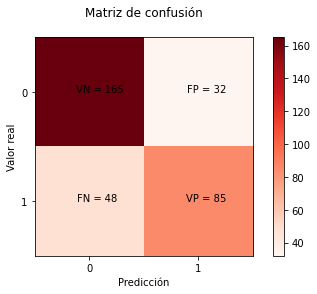

In [ ]:
grafica_matriz_confusion(cm, classes=[0,1], normalize=False, title='Matriz de confusión\n', cmap=plt.cm.Reds)

In [ ]:
# Cuántos errores cometimos?
32+48

80

In [ ]:
# Calcula la efectividad
(85+165)/(165+48+85+32)

0.7575757575757576

In [ ]:
# Calcula el recall 
85/(85+48)

0.6390977443609023

In [ ]:
#y la precisión de la predicción
85/(85+32)

0.7264957264957265

In [ ]:
# Utiliza la función de sklearn llamada roc_curve para determinar la lista de tasa de falsos y verdaderos positivos



Esta sección de la tarea es extra, por lo que puedes decidir hacerla o no.

Por ser extra, solo se dará el objetivo, más no se guiará con comentarios.

**Objetivo:** Construir una función que determine el hyper parámetro óptimo para un estimador de regresión Ridge. Lo primero es que la función ejecute el algoritmo de K-Fold Cross Validation sin utilizar funciones de librería de python, i.e. construye tu propia función de validación cruzada. **No se aceptaran funciones que contengan métodos para validación cruzada ya construidos**. Después, la función tiene que mostrar de manera gráfica el trade-off entre sesgo y varianza para las curvas de error en el set de datos de train y test. 

Utiliza la función o funciones que creaste para determinar el parámetro alpha óptimo para una regresión Ridge en un set de datos que consideres adecuado. Muestra la gráfica que muestre el trade-off entre sesgo y varianza